Compare qPCR and amplicon sequencing results for plate 9

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

In [3]:
QPCR_FN = '20200317_pk10_amplicon-plate9-summary.xlsx'
AMPSEQ_FN = '../../../data/phylo_ampl_dada2/run9/dada2/output/stats.tsv'

In [4]:
qpcr_df = pd.read_excel(QPCR_FN, skiprows=2)
qpcr_df = qpcr_df[~qpcr_df.orig_sample.isna()]
qpcr_df

,Include,Pos,Name,Sample,orig_sample,lysis,533-580 rep1,533-580 rep2,avg 533,uninfected average,465-510 rep1,465-510 rep2,avg 456,uninfected average.1
0,True,A1,Sample 1,"stephensi (unfed) 1st lysis, 0.83ng/ul",un1,1,1.753,1.603,1.6780,0.511125,1.570,1.376,1.4730,0.38175
1,True,B1,Sample 13,"stephensi (unfed) 1st lysis, 0.673ng/ul",un2,1,0.443,0.337,0.3900,NaN,0.333,0.207,0.2700,NaN
2,True,C1,Sample 25,"stephensi (unfed) 1st lysis, 0.771ng/ul",un3,1,0.267,0.377,0.3220,uninfected stdev,0.143,0.238,0.1905,uninfected stdev
3,True,D1,Sample 37,"stephensi (unfed) 1st lysis, 0.621ng/ul",un4,1,0.324,0.354,0.3390,0.461582,0.187,0.259,0.2230,0.431523
4,True,E1,Sample 49,"stephensi (unfed) 1st lysis, 0.804ng/ul",un5,1,0.331,0.366,0.3485,NaN,0.213,0.268,0.2405,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,True,D9,Sample 45,"stephensi (9 days after feeding) 2nd lysis, 0....",9d4,2,0.770,0.674,0.7220,NaN,10.976,6.576,8.7760,NaN
84,True,E9,Sample 57,"stephensi (9 days after feeding) 2nd lysis, 1....",9d5,2,0.777,0.747,0.7620,NaN,7.079,2.600,4.8395,NaN
85,True,F9,Sample 69,"stephensi (9 days after feeding) 2nd lysis, 0....",9d6,2,0.582,0.754,0.6680,NaN,0.314,0.477,0.3955,NaN
86,True,G9,Sample 81,"stephensi (9 days after feeding) 2nd lysis, 1....",9d7,2,1.038,0.649,0.8435,NaN,13.569,6.273,9.9210,NaN


In [5]:
ampseq_df = pd.read_csv(AMPSEQ_FN, sep='\t')
ampseq_df

,s_Sample,target,input,filtered,denoisedF,denoisedR,merged,nonchim,final
0,10_0d1,0,377,377,377,377,377,377,377
1,10_0d1,1,66,65,65,65,65,65,65
2,10_0d1,10,126,125,125,125,125,125,125
3,10_0d1,11,154,153,153,152,152,152,152
4,10_0d1,12,272,268,268,268,262,262,262
...,...,...,...,...,...,...,...,...,...
51387,Aory-SP141,7,7,7,7,7,5,5,0
51388,Aory-SP141,8,18,18,18,18,18,18,10
51389,Aory-SP141,9,20,19,19,19,19,19,11
51390,Aory-SP141,P1,0,0,0,0,0,0,0


In [6]:
# remove non-rebalancing samples
ampseq_df = ampseq_df[~ampseq_df.s_Sample.str.startswith('A') & 
                      ampseq_df.target.str.startswith('P')].copy()
ampseq_df[['pool', 'orig_sample']] = ampseq_df.s_Sample.str.split('_', expand=True)
ampseq_df['sampling_point'] = ampseq_df.orig_sample.str.slice(0, -1)
ampseq_df['individual'] = ampseq_df.orig_sample.str.get(-1)
ampseq_df['log_input'] = np.log10(ampseq_df.input.replace(0,.1))
ampseq_df

,s_Sample,target,input,filtered,denoisedF,denoisedR,merged,nonchim,final,pool,orig_sample,sampling_point,individual,log_input
62,10_0d1,P1,3127,3125,3125,3125,3125,3125,3125,10,0d1,0d,1,3.495128
63,10_0d1,P2,29500,29484,29481,29474,29462,29462,29462,10,0d1,0d,1,4.469822
126,10_0d2,P1,4022,4019,4019,4017,4017,4017,4017,10,0d2,0d,2,3.604442
127,10_0d2,P2,37581,37559,37549,37553,37547,37547,37547,10,0d2,0d,2,4.574968
190,10_0d3,P1,1885,1883,1883,1883,1883,1883,1883,10,0d3,0d,3,3.275311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51071,9_un6,P2,10,10,10,10,10,10,10,9,un6,un,6,1.000000
51134,9_un7,P1,0,0,0,0,0,0,0,9,un7,un,7,-1.000000
51135,9_un7,P2,0,0,0,0,0,0,0,9,un7,un,7,-1.000000
51198,9_un8,P1,0,0,0,0,0,0,0,9,un8,un,8,-1.000000


In [7]:
pool_ids = {'4':'80x P1/10x P2','9':'80x P1/20x P2'}

1 80x P1/10x P2 P1 
 LinregressResult(slope=5.149093635033911, intercept=9.123059880130295, rvalue=0.5928337310563528, pvalue=5.558440372496275e-05, stderr=1.1346899365997842) 

1 80x P1/10x P2 P2 
 LinregressResult(slope=4.833141475610473, intercept=4.312801342802075, rvalue=0.5949741878264155, pvalue=5.142339575062736e-05, stderr=1.0591507184532598) 

1 80x P1/20x P2 P1 
 LinregressResult(slope=5.032411592875533, intercept=8.302618370188348, rvalue=0.6488403207795952, pvalue=5.945104065877745e-06, stderr=0.9573883685838872) 

1 80x P1/20x P2 P2 
 LinregressResult(slope=5.379610989957296, intercept=0.11891497174892152, rvalue=0.6363916480925235, pvalue=1.0153425640693585e-05, stderr=1.0577795209711054) 



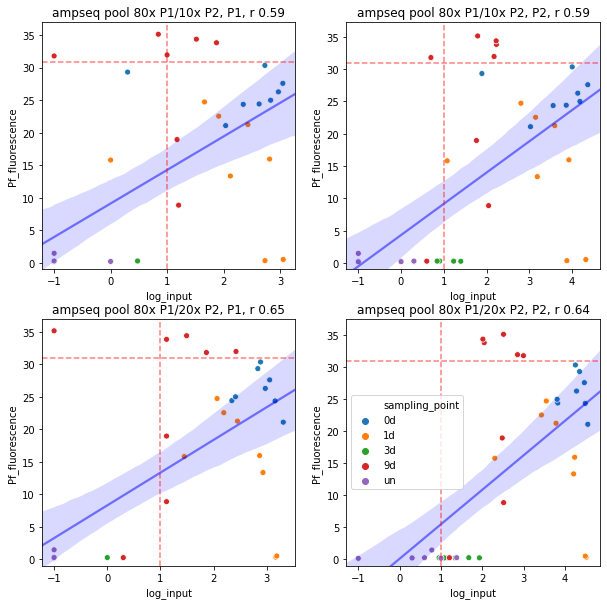

In [8]:
# read counts vs amplification for a given pool
lysis = 1 # first extraction
legend=False
fig, axs = plt.subplots(2,2, figsize=(10,10))
for x_axs, pool in zip(axs, ('4','9')):
    for ax, target in zip(x_axs, ('P1','P2')):
        pool_id = pool_ids[pool]
        a = ampseq_df[(ampseq_df.pool == pool) &
                      (ampseq_df.target == target)] \
                .set_index('orig_sample')
        q = qpcr_df[qpcr_df.lysis == lysis].set_index('orig_sample')
        comb = a.merge(q, left_index=True, right_index=True)
        comb_reg = linregress(comb.log_input,comb['avg 456'])
        print(lysis, pool_id, target,'\n',comb_reg,'\n')
        if pool=='9' and target=='P2':
            legend='brief'
        sns.scatterplot(data=comb, x='log_input', y='avg 456', hue='sampling_point', ax=ax, legend=legend)
        sns.regplot(data=comb, x='log_input', y='avg 456', 
                    scatter=False,
                    color='b', line_kws={'alpha':.5},
                    ax=ax)
        ax.set_ylabel('Pf_fluorescence')
#         ax.set_xlim(-.1)
        ax.set_ylim(-1)
        # manually input 5pg line
        ax.axhline(30.9, c='r', linestyle='--', alpha=.5)
        ax.axvline(1, c='r', linestyle='--', alpha=.5)
        ax.set_title('ampseq pool {}, {}, r {:.2f}'.format(pool_id, target, comb_reg.rvalue))
        legend=False
#     fig.suptitle('Amplicon sequencing and qPCR for extraction 1')

2 80x P1/10x P2 P1 
 LinregressResult(slope=5.436239662546454, intercept=5.447672456475533, rvalue=0.7829299572841931, pvalue=2.3757538396527656e-09, stderr=0.700730421976064) 

2 80x P1/10x P2 P2 
 LinregressResult(slope=5.319368663482587, intercept=-0.02388464820990599, rvalue=0.8191263687021776, pvalue=1.0427655747077268e-10, stderr=0.6042775350893466) 

2 80x P1/20x P2 P1 
 LinregressResult(slope=5.336381457492464, intercept=4.559333806072415, rvalue=0.8606582614481036, pvalue=1.0760807809992637e-12, stderr=0.512151261128263) 

2 80x P1/20x P2 P2 
 LinregressResult(slope=5.761332376190595, intercept=-4.255474896505456, rvalue=0.85254778283761, pvalue=2.9273375959785974e-12, stderr=0.5729579714389349) 



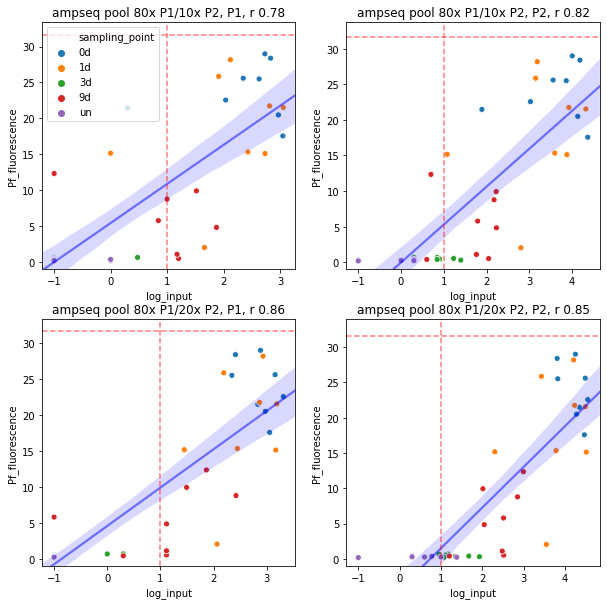

In [9]:
# read counts vs amplification for a given pool
lysis = 2 # second extraction
legend='brief'
fig, axs = plt.subplots(2,2, figsize=(10,10))
for x_axs, pool in zip(axs, ('4','9')):
    for ax, target in zip(x_axs, ('P1','P2')):
        pool_id = pool_ids[pool]
        a = ampseq_df[(ampseq_df.pool == pool) &
                      (ampseq_df.target == target)] \
                .set_index('orig_sample')
        q = qpcr_df[qpcr_df.lysis == lysis].set_index('orig_sample')
        comb = a.merge(q, left_index=True, right_index=True)
        comb_reg = linregress(comb.log_input,comb['avg 456'])
        print(lysis, pool_id, target,'\n',comb_reg,'\n')
        sns.scatterplot(data=comb, x='log_input', y='avg 456', hue='sampling_point', ax=ax, legend=legend)
        sns.regplot(data=comb, x='log_input', y='avg 456', 
                    scatter=False,
                    color='b', line_kws={'alpha':.5},
                    ax=ax)
        ax.set_ylabel('Pf_fluorescence')
#         ax.set_xlim(-1)
        # manually input 5pg line
        ax.axhline(31.6, c='r', linestyle='--', alpha=.5)
        ax.set_ylim(-1)
#         ax.axhline(2, c='r', linestyle='--', alpha=.5)
        ax.axvline(1, c='r', linestyle='--', alpha=.5)        
        ax.set_title('ampseq pool {}, {}, r {:.2f}'.format(pool_id, target, comb_reg.rvalue))
        legend=False
#     fig.suptitle('Amplicon sequencing and qPCR for extraction 1')